Gabor ML - Problem 10

Outline:

Functions:
-Generate linearly separably data
-Generate non-linearly separably data
-Perceptron algorithm

Uses:
-test algorithm on different dimensions of data and types of data

In [100]:
#Libraries

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

random.seed(123)

In [126]:
#Functions

#Generate linearly separable data
def generate_ls_data(a, d, n):
    #a is a number in range [0,1]
    #d is dimension of sample data
    #n is number of sample points

    #x is a list of n numpy arrays
    #y is a list of n corresponding {-1,1}

    #determine y values with probability .5
    probability_y_equals_1 = .5
    y = [1 if random.random() > probability_y_equals_1 else -1 for _ in range(n)]
    x = []

    #creates list of x iid sample vectors based on problem conditions
    for i in range(n):
        x_i = np.zeros(d)
        for j in range(d):
            #first element based on a
            if j == 0:
                if y[i] == 1:
                    x_i[j] = random.uniform(-1,-a)
                else:
                    x_i[j] = random.uniform(a,1)
            #other elements based on [-1,1]
            else:
                x_i[j] = random.uniform(-1,1)
        x.append(x_i)        

    return x, y

def generate_nls_data(m, d, n):
    #create y data
    probability_y_equals_1 = .5
    y = [1 if random.random() >= probability_y_equals_1 else -1 for _ in range(n)]

    #create non-linearly separable data per problem description
    mean = np.zeros(d)
    mean[0] = m
    cov = np.identity(d)
    
    x_arr = np.random.multivariate_normal(mean, cov, n)
    x = [x_arr[i] for i in range(n)]

    return x, y


def perceptron_algorithm(x, y, learning_rate, max_epochs):
    #dimension requirements
    d = int(x[0].size)
    n = len(y)

    convergence_ind = 0
    steps_to_converge = max_epochs
    #random values between 0 and 1 (uniform)
    w = np.random.rand(d)
    b = 0.0

    #function vars
    update_log = np.zeros(max_epochs)
    num_epochs_taken = 0
    num_updates_per_epoch = 0

    while num_epochs_taken < max_epochs:
        for i in range(n):
            y_pred = np.sign(np.dot(w,x[i])+b)
            if y_pred != y[i]:
                w = np.add(w, learning_rate*(y[i]-y_pred)*x[i])
                b = b + learning_rate*(y[i]-y_pred)
                num_updates_per_epoch += 1
        #update vars for next epoch
        update_log[num_epochs_taken] = num_updates_per_epoch
        num_epochs_taken += 1
        num_updates_per_epoch = 0

        #check for convergence
        if update_log[num_epochs_taken-1] == 0:
            steps_to_converge = num_epochs_taken
            num_epochs_taken = max_epochs
            convergence_ind = 1

    return w, b, update_log, steps_to_converge, convergence_ind

def perceptron_algorithm_accuracy(x_test, y_test, w, b):
    n = len(y_test)
    error_count = 0
    for i in range(n):
        y_pred = np.sign(np.dot(w,x_test[i])+b)
        if y_test[i] != y_pred:
            error_count += 1

    error_rate = error_count/n

    return error_count, error_rate



In [150]:
#linearly separable case

a = .2
d = 2
n = 10

x, y = generate_ls_data(a, d, n)
print("x",x)
print("y",y)

learning_rate = .1
max_epochs = 100

w, b, update_log, steps_to_converge, convergence_ind = perceptron_algorithm(x, y, learning_rate, max_epochs)

print("steps to converge",steps_to_converge)

print("w",w)
print("b",b)

x_test, y_test = generate_ls_data(a, d, n)

error_count, error_rate = perceptron_algorithm_accuracy(x_test, y_test, w, b)

print("error rate",error_rate)

x [array([-0.40352804,  0.66066684]), array([-0.54050596, -0.61319033]), array([-0.63222339, -0.66331719]), array([ 0.85034468, -0.70446868]), array([-0.88378911,  0.92525017]), array([0.6428652 , 0.09572936]), array([-0.57263897,  0.0363991 ]), array([ 0.24736832, -0.82000981]), array([-0.62809541, -0.04172691]), array([-0.34355395,  0.93691744])]
y [1, 1, 1, -1, 1, -1, 1, -1, 1, 1]
steps to converge 4
w [-0.4873029   0.67349566]
b 0.20000000000000007
error rate 0.2


error rate 0.2


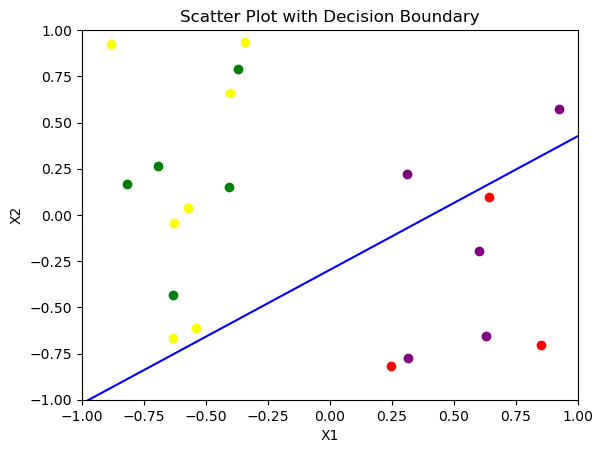

In [152]:
#Plot only when d = 2

print("error rate", error_rate)

# Scatter plot
for xi, yi in zip(x, y):
    if yi == 1:
        plt.scatter(xi[0], xi[1], color='yellow')
    else:
        plt.scatter(xi[0], xi[1], color='red')
#test data
for xi, yi in zip(x_test, y_test):
    if yi == 1:
        plt.scatter(xi[0], xi[1], color='green')
    else:
        plt.scatter(xi[0], xi[1], color='purple')

# To plot the line, we need two points that satisfy the equation. Let's choose two x values:
x_values = np.array([-1,1])
# Calculate corresponding y values
y_values = (-b - w[0]*x_values) / w[1]

plt.xlim(-1,1)
plt.ylim(-1,1)
plt.plot(x_values, y_values, color='blue')  # Plotting the line
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Linearly Separable - Scatter Plot with Decision Boundary')
plt.show()


In [164]:
#Non-linearly separable case

m = 0 #or another value greater than 0
d = 2
n = 10

x, y = generate_nls_data(m, d, n)
print("x",x)
print("y",y)

learning_rate = .1
max_epochs = 100

w, b, update_log, steps_to_converge, convergence_ind = perceptron_algorithm(x, y, learning_rate, max_epochs)

print("convergence indicator",convergence_ind)
print("steps to converge",steps_to_converge)

print("w",w)
print("b",b)

error_count, error_rate = perceptron_algorithm_accuracy(x, y, w, b)

print("error rate",error_rate)

x [array([-0.04296584,  0.50925945]), array([ 0.58918543, -0.16530453]), array([1.93301802, 1.0353672 ]), array([0.22103113, 0.67705577]), array([-1.16229923,  1.6448748 ]), array([-0.5208698 , -0.28146318]), array([0.31742821, 0.33210132]), array([-1.19996482, -1.25229138]), array([-0.35210789, -1.14326536]), array([ 0.29417736, -0.95799989])]
y [1, 1, -1, -1, 1, 1, 1, 1, -1, -1]
convergence indicator 0
steps to converge 100
w [-0.39887269  0.43659864]
b 0.0
error rate 0.3


error rate 0.3


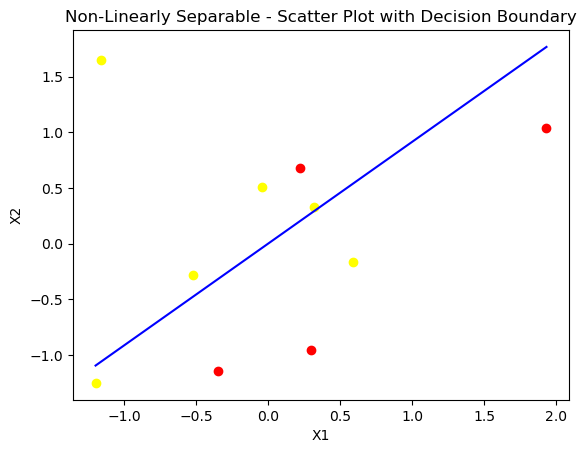

In [165]:
#Plot only when d = 2

print("error rate", error_rate)

# Scatter plot
for xi, yi in zip(x, y):
    if yi == 1:
        plt.scatter(xi[0], xi[1], color='yellow')
    else:
        plt.scatter(xi[0], xi[1], color='red')

# To plot the line, we need two points that satisfy the equation. Let's choose two x values:
x_values = np.array([min(x, key=lambda v: v[0])[0], max(x, key=lambda v: v[0])[0]])
# Calculate corresponding y values
y_values = (-b - w[0]*x_values) / w[1]

plt.plot(x_values, y_values, color='blue')  # Plotting the line
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Non-Linearly Separable - Scatter Plot with Decision Boundary')
plt.show()